# Matrix multiplication from foundations

In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path("data")
path_data.mkdir(exist_ok=True)
path_gz = path_data/"mnist.pkl.gz"

In [3]:
path_data

WindowsPath('data')

In [4]:
path_gz

WindowsPath('data/mnist.pkl.gz')

In [5]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [6]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [7]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((50000, 784), (50000,), (10000, 784), (10000,))

In [8]:
x_train[0].shape

(784,)

In [9]:
len(list(x_train[0]))

784

In [10]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [11]:
for i in range(0,10,2): print(i)

0
2
4
6
8


In [12]:
[i for i in range(0,10,2)]

[0, 2, 4, 6, 8]

In [13]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

In [14]:
list(chunks(vals,5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

In [15]:
len(list(chunks(lst1, 28))[0]),len(list(chunks(lst1, 28))[1])

(28, 28)

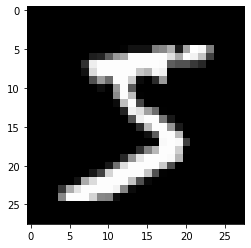

In [16]:
mpl.rcParams["image.cmap"] = "gray"
plt.imshow(list(chunks(lst1, 28)));

**islice**

Similar to chunks function

In [17]:
from itertools import islice

In [18]:
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [19]:
iter(vals)

In [20]:
list(iter(vals))

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [21]:
it = iter(vals)
islice(it, 5)

In [22]:
list(islice(it,5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [23]:
list(islice(it,5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [24]:
list(islice(it,5))

[]

In [25]:
list(islice(it,5))

[]

In [26]:
iter(vals)

In [27]:
it_next = iter(vals)
next(it_next)

0.0

In [28]:
next(it_next)

0.0

In [29]:
next(it_next)

0.0

In [30]:
next(it_next)

0.19140625

In [31]:
next(it_next)

0.9296875

In [32]:
next(it_next)

0.98828125

In [33]:
len(lst1)

784

In [34]:
print(list(islice(iter(lst1),28)))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [35]:
lambda: list(islice(iter(lst1),28))

<function __main__.<lambda>()>

In [36]:
iter(lambda: list(islice(iter(lst1),28)), [])

In [37]:
it = iter(lst1)
it

In [38]:
print(list(iter(lambda: list(islice(it, 28)), [])))

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01171875, 0.0703125, 0.0703125, 0.0703125, 0.4921875, 0.53125, 0.68359375, 0.1015625, 0.6484375, 0.99609375, 0.96484375, 0.49609375, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1171875, 0.140625, 0.3671875,

In [39]:
print(list(iter(lambda: list(islice(it, 28)), [])))

[]


In [40]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

In [41]:
len(img)

28

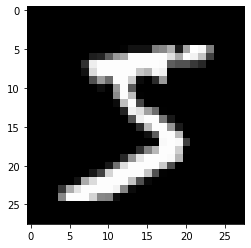

In [42]:
plt.imshow(img);

## Matrix and tensor

In [43]:
len(img), img[20][15]

(28, 0.98828125)

In [44]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [45]:
m = Matrix(img)
m[20,15]

0.98828125

In [46]:
import torch
from torch import tensor

In [47]:
tensor([1,2,3])

tensor([1, 2, 3])

In [48]:
type(x_train)

numpy.ndarray

In [49]:
# map numpy to tensor #
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid)) 

In [50]:
x_train.shape, x_train.type(), type(x_train), x_train.type(), x_train.dtype

(torch.Size([50000, 784]),
 'torch.FloatTensor',
 torch.Tensor,
 'torch.FloatTensor',
 torch.float32)

In [51]:
x_train.shape, x_train.reshape(-1,28,28).shape, x_train.reshape((-1,28,28)).shape

(torch.Size([50000, 784]),
 torch.Size([50000, 28, 28]),
 torch.Size([50000, 28, 28]))

In [52]:
imgs = x_train.reshape((-1,28,28))
imgs.shape

torch.Size([50000, 28, 28])

In [53]:
imgs[0].shape

torch.Size([28, 28])

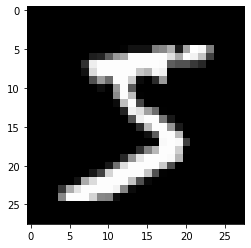

In [54]:
plt.imshow(imgs[0]);

In [55]:
print(imgs[0])

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [56]:
imgs[0,0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [57]:
imgs[0,5]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0117, 0.0703, 0.0703, 0.0703, 0.4922, 0.5312,
        0.6836, 0.1016, 0.6484, 0.9961, 0.9648, 0.4961, 0.0000, 0.0000, 0.0000,
        0.0000])

In [58]:
imgs[0,20]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0938, 0.4453, 0.8633, 0.9883, 0.9883, 0.9883, 0.9883, 0.7852,
        0.3047, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [59]:
imgs[0,20,15]

tensor(0.9883)

In [60]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [61]:
n,c

(50000, 784)

In [62]:
min(y_train), max(y_train), y_train.min(), y_train.max()

(tensor(0), tensor(9), tensor(0), tensor(9))

## Random numbers

Based on the Wichmann Hill algorithm used before Python 2.3.

In [63]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [64]:
seed(457428938475)
rnd_state

(4976, 20238, 499)

In [65]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30269 + y/30307 + z/30323) % 1.0

In [66]:
rand(),rand(),rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

In [67]:
seed(447)
rand(),rand(),rand()

(0.5421877696573199, 0.7141775624983646, 0.14743538673893375)

In [68]:
seed(48)
rand(),rand(),rand()

(0.2880994284501441, 0.2650712160713269, 0.35025014771551044)

In [69]:
[print("yo") for _ in range(3)];

yo
yo
yo


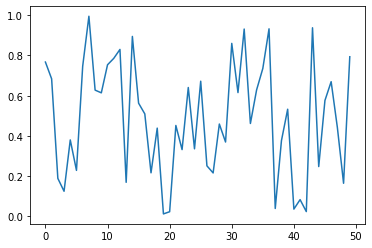

In [70]:
plt.plot([rand() for _ in range(50)]);

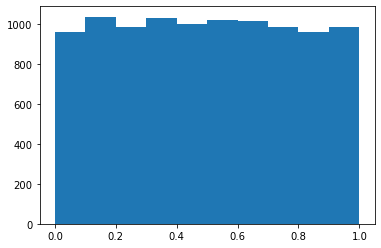

In [71]:
plt.hist([rand() for _ in range(10000)]);

In [72]:
chunks??

```python
Signature: chunks(x, sz)
Docstring: <no docstring>
Source:   
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]
File:      d:\local disk(source)\coding\deep learning\fastai 22 stable diffusion\notebook recreated\<ipython-input-18-ebfe80a2facc>
Type:      function
```

In [73]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

19.2 ms ± 4.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [74]:
%timeit -n 10 torch.randn(784,10)

The slowest run took 28.02 times longer than the fastest. This could mean that an intermediate result is being cached.
1.52 ms ± 2.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Matrix multiplication

In [75]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)
weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

In [76]:
x_valid.shape

torch.Size([10000, 784])

In [77]:
m1 = x_valid[:5]
m2 = weights

In [78]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [79]:
ar, ac = m1.shape # n_rows * n_cols
br,bc = m2.shape
(ar, ac), (br, bc)

((5, 784), (784, 10))

In [80]:
t1 = torch.zeros(ar,bc)
t1.shape

torch.Size([5, 10])

In [81]:
for i in range(ar):         # 5
    for j in range(bc):     # 10
        for k in range(ac): # 784
            t1[i,j] += m1[i,k] * m2[k,j]

In [82]:
t1

tensor([[-10.9417,  -0.6844,  -7.0038,  -4.0066,  -2.0857,  -3.3588,   3.9127,
          -3.4375, -11.4696,  -2.1153],
        [ 14.5430,   5.9977,   2.8914,  -4.0777,   6.5914, -14.7383,  -9.2787,
           2.1577, -15.2772,  -2.6758],
        [  2.2204,  -3.2171,  -4.7988,  -6.0453,  14.1661,  -8.9824,  -4.7922,
          -5.4446, -20.6758,  13.5657],
        [ -6.7097,   8.8998,  -7.4611,  -7.8966,   2.6994,  -4.7260, -11.0278,
         -12.9776,  -6.4443,   3.6376],
        [ -2.4444,  -6.4034,  -2.3984,  -9.0371,  11.1772,  -5.7724,  -8.9214,
          -3.7862,  -8.9827,   5.2797]])

In [83]:
t1.shape

torch.Size([5, 10])

In [84]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [85]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [86]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [87]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [88]:
(ar,ac),(br,bc) = m1.shape,m2.shape
c = torch.zeros(ar, bc)
c

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [89]:
matmul(m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [90]:
%timeit _=matmul(m1, m2)

2.47 s ± 351 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [91]:
%time _=matmul(m1,m2)

Wall time: 2.04 s


In [92]:
ar*bc*ac

39200

## Numba

In [93]:
from numba import njit

In [94]:
def dot(a,b):
    res = 0.
    for i in range(len(a)):
        res = res + a[i]*b[i]
    return res

In [95]:
from numpy import array

In [96]:
dot(array([1.,2,3]),array([2.,3,4]))

20.0

In [97]:
@njit
def dot2(a,b):
    res = 0.
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [98]:
dot2(array([1.,2,3]),array([2.,3,4]))

20.0

In [99]:
%time dot(array([1.,2,3]),array([2.,3,4]))

Wall time: 0 ns


20.0

In [100]:
%timeit dot(array([1.,2,3]),array([2.,3,4]))

7.39 µs ± 679 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [101]:
%timeit dot(array([1.,2,3]),array([2.,3,4]))

7.62 µs ± 666 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [102]:
%timeit dot2(array([1.,2,3]),array([2.,3,4]))

6.62 µs ± 844 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [103]:
%timeit dot2(array([1.,2,3]),array([2.,3,4]))

5.44 µs ± 539 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Now only two of our loops are running in python, not three

**OLD VERSION**
```python
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c
```

**NEW VERSION**

In [104]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = dot2(a[i,:],b[:,j])
    return c

In [105]:
matmul(m1, m2)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at <ipython-input-97-4b06d91b5f0b> (3)[0m
[1m
File "<ipython-input-97-4b06d91b5f0b>", line 3:[0m
[1mdef dot2(a,b):
[1m    res = 0.
[0m    [1m^[0m[0m

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'torch.Tensor'>[0m
- argument 1: [1mCannot determine Numba type of <class 'torch.Tensor'>[0m


In [106]:
m1.dtype, type(m1), m1.type()

(torch.float32, torch.Tensor, 'torch.FloatTensor')

In [107]:
type(m1.numpy())

numpy.ndarray

In [108]:
m1a,m2a = m1.numpy(), m2.numpy()

In [109]:
type(m1a), type(m2a)

(numpy.ndarray, numpy.ndarray)

In [110]:
from fastcore.test import *

In [111]:
# test_close??

```python
def test_close(a,b,eps=1e-5):
    "`test` that `a` is within `eps` of `b`"
    test(a,b,partial(is_close,eps=eps),'close')
```

In [112]:
matmul(m1a,m2a)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [113]:
test_close(t1,matmul(m1a,m2a))

In [114]:
# example of test_close failed #
t1_sample = tensor([[0,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  0, -11.47,  -2.12],
        [ 14.54,   0,   2.89,  -4.08,   6.59, -14.74,  0,   2.16, 0,  -2.68],
        [  2.22,  -3.22,  0,  -6.05,  14.17,  -8.98,  0,  -5.44, -20.68,  0],
        [ -6.71,   8.90,  -7.46,  0,   2.70,  0, -11.03, -12.98,  -6.44,   0],
        [ -2.44,  -6.40,  -2.40,  -9.04,  0,  -5.77,  -8.92,  -3.79,  -8.98,   0]])

test_close(t1_sample,matmul(m1a,m2a))

AssertionError: close:
tensor([[  0.00,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,   0.00, -11.47,  -2.12],
        [ 14.54,   0.00,   2.89,  -4.08,   6.59, -14.74,   0.00,   2.16,   0.00,  -2.68],
        [  2.22,  -3.22,   0.00,  -6.05,  14.17,  -8.98,   0.00,  -5.44, -20.68,   0.00],
        [ -6.71,   8.90,  -7.46,   0.00,   2.70,   0.00, -11.03, -12.98,  -6.44,   0.00],
        [ -2.44,  -6.40,  -2.40,  -9.04,   0.00,  -5.77,  -8.92,  -3.79,  -8.98,   0.00]])
tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [115]:
# old matmul: ie.no Numba functionality #
def matmul_old(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): c[i,j] += a[i,k] * b[k,j]
    return c

In [116]:
# old matmul #

```python
%timeit _matmul(m1,m2)
```
1.95 s ± 5.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [117]:
# new matmul #
%timeit -n 50 matmul(m1a,m2a)

1.11 ms ± 88.3 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [118]:
%timeit -n 50 matmul(m1a,m2a)

1.12 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Elementwise ops

In [119]:
tensor([10.,6,-4]).type()

'torch.FloatTensor'

In [120]:
tensor([10,6,-4]).type()

'torch.LongTensor'

In [121]:
a = tensor([10.,6,-4])
b = tensor([2.,8,7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [122]:
a+b

tensor([12., 14.,  3.])

In [123]:
a<b

tensor([False,  True,  True])

In [124]:
(a<b).float()

tensor([0., 1., 1.])

In [125]:
(a<b).float().mean()

tensor(0.67)

In [126]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [127]:
m*m

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

In [128]:
sf = (m*m).sum()
sf

tensor(285.)

In [129]:
sf.sqrt()

tensor(16.88)

In [130]:
m[2,:],m[:,2]

(tensor([7., 8., 9.]), tensor([3., 6., 9.]))

In [131]:
m[2]

tensor([7., 8., 9.])

In [135]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc): c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [133]:
test_close(t1, matmul(m1,m2))

In [138]:
%timeit -n 50 _=matmul(m1,m2)

2.9 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


**Numba is still faster: `1.12 ms ± 120 µs per loop`**

# Broadcasting

In [139]:
a

tensor([10.,  6., -4.])

In [140]:
a>0

tensor([ True,  True, False])

In [141]:
a+1

tensor([11.,  7., -3.])

In [142]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [143]:
2*m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

In [144]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [145]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [146]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [147]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [148]:
t = c.expand_as(m); t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [149]:
m+t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [150]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [151]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [152]:
c

tensor([10., 20., 30.])

In [153]:
c.unsqueeze(0), c[None, :]

(tensor([[10., 20., 30.]]), tensor([[10., 20., 30.]]))

In [154]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [155]:
c

tensor([10., 20., 30.])

In [157]:
c.unsqueeze(1), c[:,None]

(tensor([[10.],
         [20.],
         [30.]]),
 tensor([[10.],
         [20.],
         [30.]]))

In [158]:
c.shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([3, 1]))

In [161]:
c[None], c[None].shape

(tensor([[10., 20., 30.]]), torch.Size([1, 3]))

In [163]:
c[...,None], c[...,None].shape

(tensor([[10.],
         [20.],
         [30.]]),
 torch.Size([3, 1]))

In [164]:
c[:,None]

tensor([[10.],
        [20.],
        [30.]])

In [165]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [166]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [167]:
c[None,:]

tensor([[10., 20., 30.]])

In [168]:
c[None,:].expand_as(m)

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [169]:
m + c[None,:]

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

## Broadcasting rules

In [170]:
c

tensor([10., 20., 30.])

In [172]:
c[None,:], c[None,:].shape

(tensor([[10., 20., 30.]]), torch.Size([1, 3]))

In [174]:
c[:,None], c[:,None].shape

(tensor([[10.],
         [20.],
         [30.]]),
 torch.Size([3, 1]))

In [175]:
c[None,:].shape, c[:,None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [176]:
c[None,:] * c[:,None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [177]:
c[None,:] > c[:,None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [178]:
m*m

tensor([[ 1.,  4.,  9.],
        [16., 25., 36.],
        [49., 64., 81.]])

## Matmul with broadcasting

In [182]:
m1.shape, m1[0].shape

(torch.Size([5, 784]), torch.Size([784]))

In [183]:
digit = m1[0]
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [184]:
digit[:,None].shape

torch.Size([784, 1])

In [185]:
digit[:,None].expand_as(m2).shape

torch.Size([784, 10])

In [186]:
(digit[:,None]*m2).shape

torch.Size([784, 10])

In [187]:
def matmul(a,b):
    (ar,ac),(br,bc) = a.shape,b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
#         c[i,j] = (a[i,:] * b[:,j]).sum()      # previous version
        c[i] = (a[i,:,None]*b).sum(dim=0)
    return c

In [188]:
test_close(t1, matmul(m1,m2))

In [189]:
%timeit -n 50 _=matmul(m1,m2)

548 µs ± 57.3 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [190]:
%timeit -n 50 _=matmul(m1,m2)

644 µs ± 99 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


way faster than regular python or Numba

In [191]:
x_train.shape, weights.shape

(torch.Size([50000, 784]), torch.Size([784, 10]))

In [192]:
tr = matmul(x_train, weights)
tr

tensor([[  0.96,  -2.96,  -2.11,  ..., -15.09, -17.69,   0.60],
        [  6.89,  -0.34,   0.79,  ..., -17.13, -25.36,  16.23],
        [-10.18,   7.38,   4.13,  ...,  -6.73,  -6.79,  -1.58],
        ...,
        [  7.40,   7.64,  -3.50,  ...,  -1.02, -16.22,   2.07],
        [  3.25,   9.52,  -9.37,  ...,   2.98, -19.58,  -1.96],
        [ 15.70,   4.12,  -5.62,  ...,   8.08, -12.21,   0.42]])

In [193]:
tr.shape

torch.Size([50000, 10])

In [194]:
%time _=matmul(x_train, weights)

Wall time: 4.9 s


# Einstein summation

In [195]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [209]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] += (a[i,:] * b[:,j]).sum()
mr = torch.einsum("ik,kj->ikj",m1,m2)
mr.shape

torch.Size([5, 784, 10])

In [211]:
mr.sum(1)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [213]:
torch.einsum('ik,kj->ij', m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [214]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [216]:
test_close(tr,matmul(x_train, weights), eps=1e-3)

In [217]:
%timeit -n 5 _=matmul(x_train, weights)

90.9 ms ± 4.68 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


# Pytorch op

In [218]:
test_close(tr, x_train@weights, eps=1e-3)

In [221]:
%timeit -n 5 _=torch.matmul(x_train,weights)

89 ms ± 2.81 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


# cuda

In [222]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [223]:
res = torch.zeros(ar, bc)
matmul((0,0), m1, m2, res)
res

tensor([[-10.94,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
        [  0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00]])

In [224]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x):
        for j in range(grid_y): kernel((i,j), *args, **kwargs)

In [225]:
res = torch.zeros(ar, bc)
launch_kernel(matmul, ar, bc, m1, m2, res)
res

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [226]:
from numba import cuda

In [227]:
def matmul(grid, a,b,c):
    i,j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [228]:
@cuda.jit
def matmul(a,b,c):
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i,j] = tmp

In [229]:
r = np.zeros(tr.shape)
m1g,m2g,rg = map(cuda.to_device, (x_train,weights,r))

CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
: